Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

# Library for generating datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Libraries for importing datasets from Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Point class definiton

In [ ]:
class point:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    self.markedas = 0
  
  def get_x(self):
    return self.x 

  def get_y(self):
    return self.y

  def set_mark(self,mark):
    self.markedas = mark

  def get_mark(self):
    return self.markedas

DBScan algorithm implementation

In [ ]:
def db_scan(dataset, eps, min_pts):
  cluster_id = 0

  for i in range(len(dataset)):
    if dataset[i].markedas == 0:    
      neighbor_pts = range_query(dataset, i, eps)
      if len(neighbor_pts) >= min_pts:
        cluster_id += 1
        dataset[i].markedas = cluster_id
        expand_cluster(dataset, i, neighbor_pts, cluster_id, eps, min_pts)
      else:
        dataset[i].markedas = -1
  return dataset

def expand_cluster(dataset, i, neighbor_pts, cluster_id, eps, min_pts):
  for j in neighbor_pts:
    if dataset[j].markedas == -1:
      dataset[j].markedas = cluster_id
    elif dataset[j].markedas == 0:
      dataset[j].markedas = cluster_id
      j_neighbor_pts = range_query(dataset, j, eps)
      if len(j_neighbor_pts) >= min_pts:
        neighbor_pts += j_neighbor_pts
        
def range_query(dataset, i, eps):
  neighbor_pts = []
  for j in range(len(dataset)):
    if euclidean_distance(dataset[i], dataset[j]) < eps:
      neighbor_pts.append(j)

  return neighbor_pts



def euclidean_distance(p1, p2):
  return np.sqrt((p1.get_x() - p2.get_x()) ** 2 + (p1.get_y() - p2.get_y()) ** 2)

Function for plotting data points and clusters given the result of DBScan algorithm

In [ ]:
def plot_clusters(my_labels): 
  x_coordinates = [i.get_x() for i in my_labels]
  y_coordinates = [i.get_y() for i in my_labels]
  cluster_labels = [i.get_mark() for i in my_labels]
  plt.scatter(x_coordinates, y_coordinates, c=cluster_labels, cmap = 'jet')
  plt.figure()

Dataset loading from Google Drive folder

In [ ]:
# Configuring Google Drive file loading (run it only once)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Dataset: Spiral
  * Size: 312 points
  * Running time: 0.30556225776672363 s

0.33037328720092773


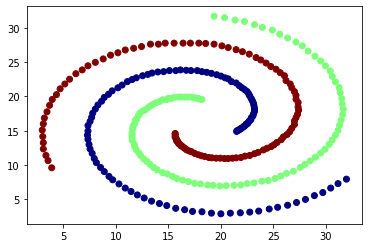

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Spiral
link = 'https://drive.google.com/open?id=125f8qgJ9704eGuG1NRzpJcJOLsNPFrfP'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
dataset = []
for index, row in df3.iterrows():
  dataset.append(point(row[0], row[1]))

start = time()
labels_compound = db_scan(dataset, 3, 3)
end = time()
print(end - start)
plot_clusters(labels_compound)

Dataset: Compound
  * Size: 399 points
  * Running time: 0.5020129680633545 s

0.4830794334411621


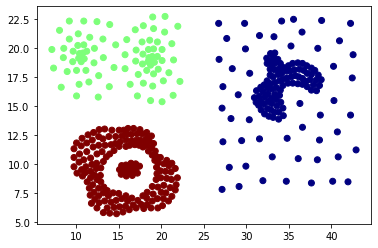

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Compound 
link = 'https://drive.google.com/open?id=1GEKPhfZFPYsf1OE3qIq9Px8Akg8Xi8tU'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
dataset = []
for index, row in df3.iterrows():
  dataset.append(point(row[0], row[1]))

start = time()
labels_compound = db_scan(dataset, 2.5, 4)
end = time()
print(end - start)
plot_clusters(labels_compound)


Generated dataset
* Size: 500
* Running time: 0.8291323184967041 s

79.44395971298218


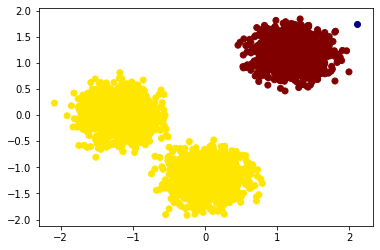

<Figure size 432x288 with 0 Axes>

In [ ]:
centers = [[2, 2], [-2, -0], [0, -2]]
X, labels_true = make_blobs(n_samples=5000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
dataset = []

for i in X:
  dataset.append(point(i[0], i[1]))

start = time()  
my_labels = db_scan(dataset, eps=0.3, min_pts=10)
end = time()
print(end - start)
plot_clusters(my_labels)

Dataset: Aggregation
  * Size: 788 points
  * Running time: 2.0507116317749023 s

2.079353094100952


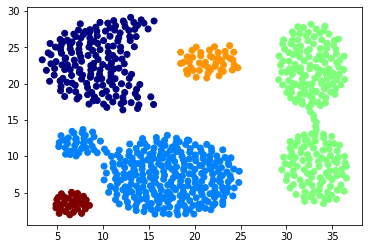

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Aggregation 
link = 'https://drive.google.com/open?id=1PO_jiPoj6SjFtscC0YCJyrCRtAeFqmOo'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
dataset = []
for index, row in df3.iterrows():
  dataset.append(point(row[0], row[1]))

start = time()
labels_compound = db_scan(dataset, 2, 4)
end = time()
print(end - start)
plot_clusters(labels_compound)

Generated dataset
* Size: 1500
* Running time: 7.113775730133057 s

166.26607203483582


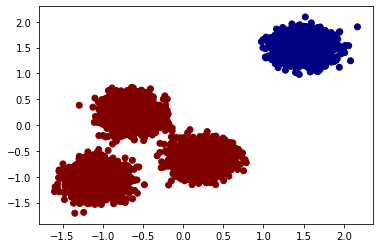

<Figure size 432x288 with 0 Axes>

In [ ]:
centers = [[3, 3], [-2, -0], [0, -2], [-3, -3]]
X, labels_true = make_blobs(n_samples=7000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
dataset = []

for i in X:
  dataset.append(point(i[0], i[1]))

start = time()  
my_labels = db_scan(dataset, eps=0.3, min_pts=10)
end = time()
print(end - start)
plot_clusters(my_labels)

Dataset: A2
  * Size: 5250 points
  * Running time: 97.08615112304688 s

In [ ]:
# Dataset: A2
link = 'https://drive.google.com/open?id=1_bMy6zAOnbK_0rRA37B8OS401MTNr47o'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='   ', header=None)# Dataset is now stored in a Pandas Dataframe
dataset = []
for index, row in df3.iterrows():
  dataset.append(point(row[0], row[1]))

start = time()
labels_compound = db_scan(dataset, 1000, 15)
end = time()
print(end - start)
print(len(set([i.get_mark() for i in labels_compound])))
plot_clusters(labels_compound)

Generated dataset
* Size: 1500
* Running time: TBD

In [ ]:
centers = [[3, 3], [-2, -0], [0, -2], [-3, -3], [-10, 5], [5, 10]]
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
dataset = []

for i in X:
  dataset.append(point(i[0], i[1]))

start = time()  
my_labels = db_scan(dataset, eps=0.3, min_pts=10)
end = time()
print(end - start)
plot_clusters(my_labels)

In [ ]:
centers = [[2, 2], [-2, -0], [0, -2]]
X, labels_true = make_blobs(n_samples=100000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
dataset = []

for i in X:
  dataset.append(point(i[0], i[1]))

start = time()  
my_labels = db_scan(dataset, eps=0.3, min_pts=10)
end = time()
print(end - start)
plot_clusters(my_labels)